<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit1-Build/blob/master/Johan_Mazorra_Data_Storytelling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data and analyze it

In [5]:
# First, we're going to load the data 
# (I left the csv file in the data storytelling folder so it can load up)
df = pd.read_csv('fifa_ranking.csv')

print(df.shape)
df.head()

(57793, 16)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [30]:
# Then I'm going to check for any missing values so
# it doesn't interfere with my graphs.
df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [32]:
# Let me just make sure just in case the NaN values appear as '?'.
df = df.replace({"?": np.NaN})
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [33]:
# Absolutely no missing values, so we can move on now.
df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [36]:
df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

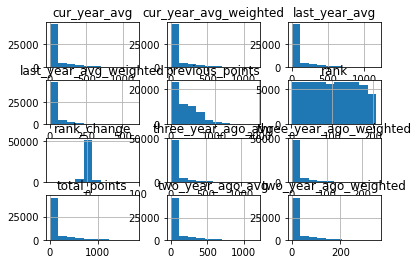

In [10]:
# Let me make a histogram to have a visualization of the columns.
df.hist();

# Clean up the data for the graphs

In [6]:
# For the first graph I just want the top ten teams so I'm going
# to use .loc to select the ranks from 1 to 10.
topten = df.loc[df['rank'].isin(['1','2', '3', '4', '5', '6', '7', '8', '9', '10'])]
topten

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
1,2,Italy,ITA,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
2,3,Switzerland,SUI,0.00,50,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
3,4,Sweden,SWE,0.00,55,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
4,5,Argentina,ARG,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57587,6,Switzerland,SUI,1198.72,1179,0,578.59,578.59,808.58,404.29,338.09,101.43,572.09,114.42,UEFA,2018-06-07
57588,7,France,FRA,1198.13,1166,0,520.12,520.12,856.75,428.38,393.65,118.09,657.68,131.54,UEFA,2018-06-07
57589,8,Poland,POL,1182.61,1128,2,499.90,499.90,896.94,448.47,375.17,112.55,608.45,121.69,UEFA,2018-06-07
57590,9,Chile,CHI,1134.66,1146,0,403.99,403.99,831.33,415.67,724.98,217.49,487.56,97.51,CONMEBOL,2018-06-07


In [35]:
# I want to see the exact format for the last five years
# to keep cleaning my data.
lastfiveyears['rank_date'].tail(55)

44985    2013-06-06
44986    2013-06-06
44987    2013-06-06
44988    2013-06-06
47499    2014-06-05
47500    2014-06-05
47501    2014-06-05
47502    2014-06-05
47503    2014-06-05
47504    2014-06-05
47505    2014-06-05
47506    2014-06-05
47507    2014-06-05
47508    2014-06-05
50014    2015-06-04
50015    2015-06-04
50016    2015-06-04
50017    2015-06-04
50018    2015-06-04
50019    2015-06-04
50020    2015-06-04
50021    2015-06-04
50022    2015-06-04
50023    2015-06-04
52522    2016-06-02
52523    2016-06-02
52524    2016-06-02
52525    2016-06-02
52526    2016-06-02
52527    2016-06-02
52528    2016-06-02
52529    2016-06-02
52530    2016-06-02
52531    2016-06-02
55050    2017-06-01
55051    2017-06-01
55052    2017-06-01
55053    2017-06-01
55054    2017-06-01
55055    2017-06-01
55056    2017-06-01
55057    2017-06-01
55058    2017-06-01
55059    2017-06-01
55060    2017-06-01
57582    2018-06-07
57583    2018-06-07
57584    2018-06-07
57585    2018-06-07
57586    2018-06-07


In [7]:
# And I also want to only use the last five years for revelance.
lastfiveyears = topten.loc[topten['rank_date'].isin(['2018-06-07', '2017-06-01', '2016-06-02', '2015-06-04', '2014-06-05', '2013-06-06'])]
print(lastfiveyears.shape)
lastfiveyears.head()

(61, 16)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
44979,1,Spain,ESP,1614.36,1538,0,912.48,912.48,485.13,242.57,1094.00,328.20,655.54,131.11,UEFA,2013-06-06
44980,2,Germany,GER,1416.35,1428,0,770.63,770.63,555.23,277.61,941.81,282.54,427.84,85.57,UEFA,2013-06-06
44981,3,Argentina,ARG,1286.52,1296,0,702.07,702.07,582.81,291.41,678.21,203.46,447.89,89.58,CONMEBOL,2013-06-06
44982,4,Croatia,CRO,1222.02,1191,0,712.29,712.29,510.10,255.05,570.30,171.09,417.97,83.59,UEFA,2013-06-06
44983,5,Netherlands,NED,1158.42,1093,4,540.33,540.33,329.59,164.80,1159.71,347.91,526.90,105.38,UEFA,2013-06-06


# Import the new csv file and make new dataframes to use in the graphs

In [8]:
lastfiveyears.to_csv(r'/content/fifa_rankings_top10_2013_2018.csv', index = False, header=True)
print(lastfiveyears)

       rank country_full  ... confederation   rank_date
44979     1        Spain  ...          UEFA  2013-06-06
44980     2      Germany  ...          UEFA  2013-06-06
44981     3    Argentina  ...      CONMEBOL  2013-06-06
44982     4      Croatia  ...          UEFA  2013-06-06
44983     5  Netherlands  ...          UEFA  2013-06-06
...     ...          ...  ...           ...         ...
57587     6  Switzerland  ...          UEFA  2018-06-07
57588     7       France  ...          UEFA  2018-06-07
57589     8       Poland  ...          UEFA  2018-06-07
57590     9        Chile  ...      CONMEBOL  2018-06-07
57591    10        Spain  ...          UEFA  2018-06-07

[61 rows x 16 columns]


In [11]:
lastfiveyears.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,5.573770,1287.293934,1279.655738,0.081967,675.521148,675.521148,627.129672,313.564918,610.119508,183.035902,575.863443,115.172787
std,2.929499,164.927558,152.958805,1.037546,156.018774,156.018774,189.388343,94.694104,210.101931,63.030180,205.388605,41.077551
min,1.000000,1065.510000,1043.000000,-3.000000,403.990000,403.990000,270.900000,135.450000,179.590000,53.880000,196.120000,39.220000
25%,3.000000,1158.420000,1163.000000,0.000000,564.840000,564.840000,510.100000,255.050000,485.130000,145.540000,447.890000,89.580000
50%,6.000000,1256.820000,1254.000000,0.000000,640.010000,640.010000,603.970000,301.990000,570.300000,171.090000,557.400000,111.480000
75%,8.000000,1383.710000,1364.000000,0.000000,770.630000,770.630000,770.630000,385.310000,704.660000,211.400000,657.680000,131.540000
max,10.000000,1775.030000,1687.000000,4.000000,1153.120000,1153.120000,1153.120000,576.560000,1159.710000,347.910000,1200.770000,240.150000


In [20]:
# The following dataframes are for specifically each year from 2013 to 2018 to
# use in the first bar graph.
twentythirteentop = lastfiveyears.loc[lastfiveyears['rank_date'].isin(['2013-06-06'])]
twentythirteentop

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
44979,1,Spain,ESP,1614.36,1538,0,912.48,912.48,485.13,242.57,1094.00,328.20,655.54,131.11,UEFA,2013-06-06
44980,2,Germany,GER,1416.35,1428,0,770.63,770.63,555.23,277.61,941.81,282.54,427.84,85.57,UEFA,2013-06-06
44981,3,Argentina,ARG,1286.52,1296,0,702.07,702.07,582.81,291.41,678.21,203.46,447.89,89.58,CONMEBOL,2013-06-06
44982,4,Croatia,CRO,1222.02,1191,0,712.29,712.29,510.10,255.05,570.30,171.09,417.97,83.59,UEFA,2013-06-06
44983,5,Netherlands,NED,1158.42,1093,4,540.33,540.33,329.59,164.80,1159.71,347.91,526.90,105.38,UEFA,2013-06-06
44984,6,Portugal,POR,1136.83,1163,-1,624.60,624.60,430.33,215.17,553.59,166.08,654.89,130.98,UEFA,2013-06-06
44985,7,Colombia,COL,1123.44,1154,-1,684.51,684.51,603.97,301.99,196.12,58.84,390.52,78.10,CONMEBOL,2013-06-06
44986,8,Italy,ITA,1096.97,1117,0,612.03,612.03,442.55,221.28,569.93,170.98,463.39,92.68,UEFA,2013-06-06
44987,9,England,ENG,1095.01,1135,-2,530.73,530.73,541.13,270.56,656.60,196.98,483.71,96.74,UEFA,2013-06-06
44988,10,Ecuador,ECU,1065.51,1058,0,731.89,731.89,401.33,200.67,179.59,53.88,395.34,79.07,CONMEBOL,2013-06-06


In [21]:
twentyfourteen = lastfiveyears.loc[lastfiveyears['rank_date'].isin(['2014-06-05'])]
twentyfourteen

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
47499,1,Spain,ESP,1484.58,1460,0,664.00,664.00,912.48,456.24,485.13,145.54,1094.00,218.80,UEFA,2014-06-05
47500,2,Germany,GER,1299.59,1340,0,559.35,559.35,770.63,385.31,555.23,166.57,941.81,188.36,UEFA,2014-06-05
47501,3,Brazil,BRA,1242.23,1210,1,845.26,845.26,272.30,136.15,449.00,134.70,630.60,126.12,CONMEBOL,2014-06-05
47502,4,Portugal,POR,1189.40,1245,-1,637.29,637.29,624.60,312.30,430.33,129.10,553.59,110.72,UEFA,2014-06-05
47503,5,Argentina,ARG,1174.50,1178,2,512.98,512.98,702.07,351.04,582.81,174.84,678.21,135.64,CONMEBOL,2014-06-05
47504,6,Switzerland,SUI,1148.57,1161,2,640.01,640.01,594.58,297.29,411.83,123.55,438.60,87.72,UEFA,2014-06-05
47505,7,Uruguay,URU,1147.48,1181,-1,671.34,671.34,270.90,135.45,740.62,222.18,592.50,118.50,CONMEBOL,2014-06-05
47506,8,Colombia,COL,1137.04,1186,-3,574.37,574.37,684.51,342.25,603.97,181.19,196.12,39.22,CONMEBOL,2014-06-05
47507,9,Italy,ITA,1103.95,1115,0,556.81,556.81,612.03,306.02,442.55,132.77,541.80,108.36,UEFA,2014-06-05
47508,10,England,ENG,1090.30,1043,1,531.28,531.28,530.73,265.37,541.13,162.34,656.60,131.32,UEFA,2014-06-05


In [22]:
twentyfifteen = lastfiveyears.loc[lastfiveyears['rank_date'].isin(['2015-06-04'])]
twentyfifteen

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
50014,1,Germany,GER,1775.03,1687,0,1153.12,1153.12,559.35,279.68,770.63,231.19,555.23,111.05,UEFA,2015-06-04
50015,2,Belgium,BEL,1508.72,1457,1,961.05,961.05,557.40,278.70,740.37,222.11,234.30,46.86,UEFA,2015-06-04
50016,3,Argentina,ARG,1496.26,1494,-1,919.87,919.87,512.98,256.49,702.07,210.62,546.39,109.28,CONMEBOL,2015-06-04
50017,4,Colombia,COL,1434.92,1412,0,821.59,821.59,574.37,287.18,684.51,205.35,603.97,120.79,CONMEBOL,2015-06-04
50018,5,Brazil,BRA,1392.10,1372,0,813.06,813.06,820.68,410.34,272.30,81.69,435.06,87.01,CONMEBOL,2015-06-04
50019,6,Netherlands,NED,1377.91,1301,0,957.91,957.91,388.38,194.19,540.33,162.10,318.54,63.71,UEFA,2015-06-04
50020,7,Portugal,POR,1229.46,1221,0,617.62,617.62,637.29,318.64,624.60,187.38,529.05,105.81,UEFA,2015-06-04
50021,8,Uruguay,URU,1183.33,1176,0,618.27,618.27,671.34,335.67,270.90,81.27,740.62,148.12,CONMEBOL,2015-06-04
50022,9,France,FRA,1163.87,1127,2,704.66,704.66,449.18,224.59,451.18,135.35,496.34,99.27,UEFA,2015-06-04
50023,10,Spain,ESP,1147.01,1132,0,443.99,443.99,664.00,332.00,912.48,273.74,486.43,97.29,UEFA,2015-06-04


In [23]:
twentysixteen = lastfiveyears.loc[lastfiveyears['rank_date'].isin(['2016-06-02'])]
twentysixteen

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
52522,1,Argentina,ARG,1503.35,1532,0,741.10,741.10,919.87,459.93,512.98,153.90,742.10,148.42,CONMEBOL,2016-06-02
52523,2,Belgium,BEL,1383.71,1364,0,587.90,587.90,961.05,480.53,557.40,167.22,740.37,148.07,UEFA,2016-06-02
52524,3,Colombia,COL,1328.16,1337,1,597.24,597.24,821.59,410.79,574.37,172.31,739.06,147.81,CONMEBOL,2016-06-02
52525,4,Germany,GER,1310.49,1309,1,412.01,412.01,1153.12,576.56,559.35,167.81,770.63,154.13,UEFA,2016-06-02
52526,5,Chile,CHI,1293.33,1353,-2,793.85,793.85,489.13,244.56,610.01,183.00,359.60,71.92,CONMEBOL,2016-06-02
52527,6,Spain,ESP,1266.60,1277,0,669.64,669.64,443.99,221.99,664.00,199.20,878.81,175.76,UEFA,2016-06-02
52528,7,Brazil,BRA,1256.82,1261,0,555.56,555.56,793.26,396.63,845.26,253.58,255.28,51.06,CONMEBOL,2016-06-02
52529,8,Portugal,POR,1181.43,1184,0,564.84,564.84,617.62,308.81,637.29,191.19,582.96,116.59,UEFA,2016-06-02
52530,9,Uruguay,URU,1149.60,1158,0,582.68,582.68,618.27,309.13,671.34,201.40,281.95,56.39,CONMEBOL,2016-06-02
52531,10,Austria,AUT,1077.49,1067,1,610.71,610.71,599.33,299.66,411.65,123.49,218.11,43.62,UEFA,2016-06-02


In [24]:
twentyseventeen = lastfiveyears.loc[lastfiveyears['rank_date'].isin(['2017-06-01'])]
twentyseventeen

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
55050,1,Brazil,BRA,1715.02,1672,0,1038.91,1038.91,555.56,277.78,793.26,237.98,801.78,160.36,CONMEBOL,2017-06-01
55051,2,Argentina,ARG,1626.23,1603,0,877.12,877.12,741.10,370.55,919.87,275.96,512.98,102.60,CONMEBOL,2017-06-01
55052,3,Germany,GER,1511.44,1464,0,857.80,857.80,412.01,206.00,1153.12,345.94,508.50,101.70,UEFA,2017-06-01
55053,4,Chile,CHI,1422.14,1411,0,756.47,756.47,793.85,396.92,489.13,146.74,610.01,122.00,CONMEBOL,2017-06-01
55054,5,Colombia,COL,1365.63,1348,0,705.66,705.66,597.24,298.62,821.59,246.48,574.37,114.87,CONMEBOL,2017-06-01
55055,6,France,FRA,1332.16,1294,0,855.30,855.30,351.26,175.63,704.66,211.40,449.18,89.84,UEFA,2017-06-01
55056,7,Belgium,BEL,1291.57,1281,0,597.83,597.83,587.90,293.95,961.05,288.32,557.40,111.48,UEFA,2017-06-01
55057,8,Portugal,POR,1266.76,1259,0,671.59,671.59,564.84,282.42,617.62,185.29,637.29,127.46,UEFA,2017-06-01
55058,9,Switzerland,SUI,1263.29,1212,0,788.68,788.68,355.32,177.66,563.16,168.95,640.01,128.00,UEFA,2017-06-01
55059,10,Spain,ESP,1198.19,1204,0,597.37,597.37,669.64,334.82,443.99,133.20,664.00,132.80,UEFA,2017-06-01


In [25]:
twentyeighteen = lastfiveyears.loc[lastfiveyears['rank_date'].isin(['2018-06-07'])]
twentyeighteen

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57582,1,Germany,GER,1558.49,1544,0,775.06,775.06,832.00,416.00,424.26,127.28,1200.77,240.15,UEFA,2018-06-07
57583,2,Brazil,BRA,1430.57,1384,0,558.95,558.95,1082.36,541.18,560.21,168.06,811.88,162.38,CONMEBOL,2018-06-07
57584,3,Belgium,BEL,1298.32,1346,0,629.98,629.98,645.63,322.82,529.80,158.94,932.92,186.58,UEFA,2018-06-07
57585,4,Portugal,POR,1273.69,1306,0,646.92,646.92,691.82,345.91,517.77,155.33,627.63,125.53,UEFA,2018-06-07
57586,5,Argentina,ARG,1241.45,1254,0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07
57587,6,Switzerland,SUI,1198.72,1179,0,578.59,578.59,808.58,404.29,338.09,101.43,572.09,114.42,UEFA,2018-06-07
57588,7,France,FRA,1198.13,1166,0,520.12,520.12,856.75,428.38,393.65,118.09,657.68,131.54,UEFA,2018-06-07
57589,8,Poland,POL,1182.61,1128,2,499.90,499.90,896.94,448.47,375.17,112.55,608.45,121.69,UEFA,2018-06-07
57590,9,Chile,CHI,1134.66,1146,0,403.99,403.99,831.33,415.67,724.98,217.49,487.56,97.51,CONMEBOL,2018-06-07
57591,10,Spain,ESP,1125.50,1162,-2,537.05,537.05,611.48,305.74,646.40,193.92,443.99,88.80,UEFA,2018-06-07


# First barchart comparing total points of the last five years for the top ten teams

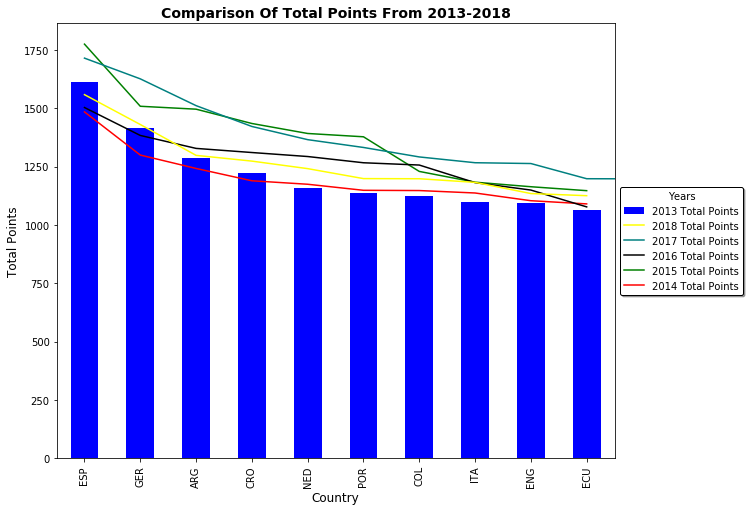

In [26]:
# Everything looks good so now let's make the first graph using matplotlib.
ax = plt.gca()


twentyfourteen.plot(kind='line',x='country_abrv',y='total_points', color='red', label='2014 Total Points', figsize=(10, 8), ax=ax)
twentyfifteen.plot(kind='line',x='country_abrv',y='total_points', color='green', label='2015 Total Points', ax=ax)
twentysixteen.plot(kind='line',x='country_abrv',y='total_points', color='black', label='2016 Total Points', ax=ax)
twentyseventeen.plot(kind='line',x='country_abrv',y='total_points', color='teal', label='2017 Total Points', ax=ax)
twentyeighteen.plot(kind='line',x='country_abrv',y='total_points', color='yellow', label='2018 Total Points', ax=ax)
twentythirteentop.plot(kind='bar',x='country_abrv',y='total_points',color='blue', label='2013 Total Points', ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Years', loc='center', bbox_to_anchor=(1.12, 0.5), shadow=True, edgecolor='black')

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Total Points', fontsize=12)
ax.set_title('Comparison Of Total Points From 2013-2018', fontsize=14, fontweight='bold')

plt.show()

# Second and third barcharts using seaborn comparing the point average of current and past year

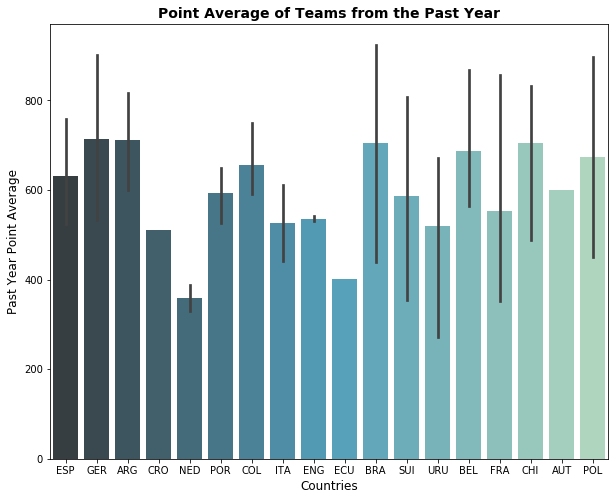

In [27]:
# Now I'm going to make the final two graphs using seaborn.
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=lastfiveyears.country_abrv, y=lastfiveyears.last_year_avg, ax=ax, palette=('GnBu_d'))
plt.xlabel("Countries", fontsize=12)
plt.ylabel("Past Year Point Average", fontsize=12)
plt.title("Point Average of Teams from the Past Year", fontsize=14, fontweight='bold')
plt.show(fig);

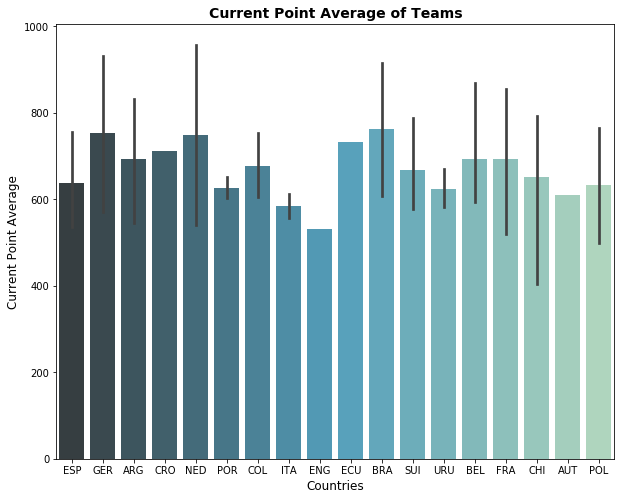

In [28]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=lastfiveyears.country_abrv, y=lastfiveyears.cur_year_avg, ax=ax, palette=('GnBu_d'))
plt.xlabel("Countries", fontsize=12)
plt.ylabel("Current Point Average", fontsize=12)
plt.title("Current Point Average of Teams", fontsize=14, fontweight='bold')
plt.show(fig);